In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Display the first 5 rows of the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Explore Data

### Subtask:
Perform initial data exploration to understand the dataset's structure, identify missing values, and analyze data types and distributions.


In [2]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [3]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nUnique values in TotalCharges column:")
print(df['TotalCharges'].unique())

print("\nValue counts for TotalCharges (top 50, if many unique values):")
print(df['TotalCharges'].value_counts().head(50))


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values in TotalCharges column:
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Value counts for TotalCharges (top 50, if many unique values):
TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
19.55      7
45.3       7
20.15      6
20.25      6
19.45      6
20.3       5
20.45      5
74.7       4
20.5       4
50.15      4
69.95      4
19.3       4
44.4       4
49.9       4
19.4       4
19.95      4
19.2       4
44         4
75.3       

In [4]:
import numpy as np

# Replace empty strings in 'TotalCharges' with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert 'TotalCharges' to numeric (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Check for remaining missing values in 'TotalCharges' after conversion
print(f"Number of missing values in 'TotalCharges' after conversion: {df['TotalCharges'].isnull().sum()}")

# For rows where TotalCharges is NaN, we can assume tenure is 0. Fill NaN with 0.
df['TotalCharges'].fillna(0, inplace=True)

# Verify that the 'TotalCharges' column is now numeric and check for rows where tenure is 0
print(f"Dtype of 'TotalCharges' after conversion: {df['TotalCharges'].dtype}")
print(f"Number of rows with TotalCharges = 0: {(df['TotalCharges'] == 0).sum()}")
print(f"Number of rows with tenure = 0: {(df['tenure'] == 0).sum()}")

Number of missing values in 'TotalCharges' after conversion: 11
Dtype of 'TotalCharges' after conversion: float64
Number of rows with TotalCharges = 0: 11
Number of rows with tenure = 0: 11


/tmp/ipython-input-260/1910562996.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [5]:
import numpy as np

# Replace empty strings in 'TotalCharges' with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert 'TotalCharges' to numeric (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Check for remaining missing values in 'TotalCharges' after conversion
print(f"Number of missing values in 'TotalCharges' after conversion: {df['TotalCharges'].isnull().sum()}")

# For rows where TotalCharges is NaN, we can assume tenure is 0. Fill NaN with 0.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify that the 'TotalCharges' column is now numeric and check for rows where tenure is 0
print(f"Dtype of 'TotalCharges' after conversion: {df['TotalCharges'].dtype}")
print(f"Number of rows with TotalCharges = 0: {(df['TotalCharges'] == 0).sum()}")
print(f"Number of rows with tenure = 0: {(df['tenure'] == 0).sum()}")

Number of missing values in 'TotalCharges' after conversion: 0
Dtype of 'TotalCharges' after conversion: float64
Number of rows with TotalCharges = 0: 11
Number of rows with tenure = 0: 11


In [6]:
df = df.drop('customerID', axis=1)
print("DataFrame columns after dropping 'customerID':")
print(df.columns)

DataFrame columns after dropping 'customerID':
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Preprocess Data

### Subtask:
Handle missing values, convert categorical features into numerical representations using techniques like one-hot encoding, and scale numerical features to prepare the data for modeling.


In [7]:
import pandas as pd

# 1. Convert 'Churn' column to numerical (0 and 1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Identify all categorical columns (object dtype and 'SeniorCitizen')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.append('SeniorCitizen') # SeniorCitizen is int but represents a category

# Remove 'Churn' from categorical_cols if it was included (it's now numerical)
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Separate categorical columns into binary and multi-category for different encoding strategies
binary_categorical_cols = []
multi_categorical_cols = []

for col in categorical_cols:
    if df[col].nunique() == 2:
        binary_categorical_cols.append(col)
    else:
        multi_categorical_cols.append(col)

print(f"Binary Categorical Columns: {binary_categorical_cols}")
print(f"Multi-Category Categorical Columns: {multi_categorical_cols}")
print(f"'Churn' column unique values after conversion: {df['Churn'].unique()}")
print(f"Data types after 'Churn' conversion: {df['Churn'].dtype}")

Binary Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']
Multi-Category Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
'Churn' column unique values after conversion: [0 1]
Data types after 'Churn' conversion: int64


In [8]:
import pandas as pd

# 3. Convert binary categorical columns to numerical (0 and 1)
# Create a copy to avoid SettingWithCopyWarning, though direct assignment should be fine for now
df_processed = df.copy()

# Handle 'gender' separately as its mapping is 'Female':0, 'Male':1
if 'gender' in binary_categorical_cols:
    df_processed['gender'] = df_processed['gender'].map({'Female': 0, 'Male': 1})
    # Remove 'gender' from the list to process remaining binary columns with 'Yes'/'No' mapping
    binary_categorical_cols.remove('gender')

# Process other binary categorical columns with 'No':0, 'Yes':1 mapping
for col in binary_categorical_cols:
    # SeniorCitizen is already 0/1, so skip it if present in the binary list
    if col != 'SeniorCitizen':
        df_processed[col] = df_processed[col].map({'No': 0, 'Yes': 1})

# 4. Apply one-hot encoding to multi-category categorical columns
# Use pd.get_dummies with drop_first=True to avoid multicollinearity
df_processed = pd.get_dummies(df_processed, columns=multi_categorical_cols, drop_first=True)

print("Data types after encoding categorical features:")
print(df_processed.dtypes.value_counts())
print("\nFirst 5 rows of DataFrame after categorical encoding:")
print(df_processed.head())

Data types after encoding categorical features:
bool       21
int64       8
float64     2
Name: count, dtype: int64

First 5 rows of DataFrame after categorical encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupp

In [9]:
from sklearn.preprocessing import StandardScaler

# 5. Identify the numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 6. Instantiate StandardScaler
scaler = StandardScaler()

# 7. Apply StandardScaler to the identified numerical features
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

print("Numerical columns after scaling:")
print(df_processed[numerical_cols].head())
print(f"Mean of 'tenure' after scaling: {df_processed['tenure'].mean():.2f}")
print(f"Standard deviation of 'tenure' after scaling: {df_processed['tenure'].std():.2f}")

Numerical columns after scaling:
     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.992611
1  0.066327       -0.259629     -0.172165
2 -1.236724       -0.362660     -0.958066
3  0.514251       -0.746535     -0.193672
4 -1.236724        0.197365     -0.938874
Mean of 'tenure' after scaling: -0.00
Standard deviation of 'tenure' after scaling: 1.00


In [10]:
print("Shape of df_processed before dropping Churn for feature concatenation:", df_processed.shape)

# The 'Churn' column is the target variable and should not be scaled or one-hot encoded directly
# It's already converted to 0/1 in an earlier step.

# Ensure 'Churn' column is not modified again here if it's already in df_processed correctly
# We will separate features (X) and target (y) later, so for now, the df_processed contains both.

print("First 5 rows of the final preprocessed DataFrame:")
print(df_processed.head())
print(f"Final preprocessed DataFrame shape: {df_processed.shape}")

Shape of df_processed before dropping Churn for feature concatenation: (7043, 31)
First 5 rows of the final preprocessed DataFrame:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160323     -0.992611      0  ...   
1                 0       -0.259629     -0.172165      0  ...   
2                 1       -0.362660     -0.958066      1  ...   
3                 0       -0.746535     -0.193672      0  ...   
4                 1        0.197365     -0.938874      1  ...   

   TechSupport_Yes  StreamingTV_No int

## Split Data

### Subtask:
Split the preprocessed dataset into training and testing sets to evaluate the model's performance on unseen data.


To prepare the data for model training, I will first separate the features (X) and the target variable (y) from the `df_processed` DataFrame. The 'Churn' column will be designated as the target variable for prediction.

In [11]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target variable (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# 2. and 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


## Train Classification Model

### Subtask:
Train a suitable classification model (e.g., Logistic Regression, Random Forest, or Gradient Boosting) on the training data to predict customer churn.


In [12]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate the chosen model (Logistic Regression)
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets and binary classification

# 2. Train the model using the fit method on the training data
model.fit(X_train, y_train)

# 3. Print a confirmation message
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


## Evaluate Model

### Subtask:
Evaluate the trained model's performance using appropriate classification metrics such as accuracy, precision, recall, F1-score, and ROC AUC on the test set. Provide clear legends for all metrics.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Use the trained model to make predictions on the X_test dataset
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (Churn = 1)

# 3-7. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 8. Print each calculated metric
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8204
Precision: 0.6829
Recall: 0.6005
F1-Score: 0.6391
ROC AUC Score: 0.8623


## Visualize Important Features

### Subtask:
Visualize the most important features identified by the model that contribute to customer churn. Include appropriate legends in the visualization.


In [14]:
import pandas as pd

# 1. Extract the coefficients from the trained model
coefficients = model.coef_[0]

# 2. Create a pandas Series mapping feature names to their corresponding coefficient values
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Calculate absolute coefficient values for sorting
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])

# 3. Sort the features by their absolute coefficient values in descending order
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# 4. Select the top 15 most important features for visualization
top_n = 15
top_features = feature_importance.head(top_n)

print(f"Top {top_n} Most Important Features (Sorted by Absolute Coefficient):")
print(top_features)

Top 15 Most Important Features (Sorted by Absolute Coefficient):
                           Feature  Coefficient  Abs_Coefficient
26               Contract_Two year    -1.397728         1.397728
4                           tenure    -1.362689         1.362689
11     InternetService_Fiber optic     0.761955         0.761955
5                     PhoneService    -0.759124         0.759124
8                     TotalCharges     0.656235         0.656235
25               Contract_One year    -0.640415         0.640415
14              OnlineSecurity_Yes    -0.449535         0.449535
20                 TechSupport_Yes    -0.368980         0.368980
6                 PaperlessBilling     0.330969         0.330969
28  PaymentMethod_Electronic check     0.316191         0.316191
24             StreamingMovies_Yes     0.273829         0.273829
10               MultipleLines_Yes     0.242637         0.242637
16                OnlineBackup_Yes    -0.192003         0.192003
22                 Stream

/tmp/ipython-input-260/3503907447.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')


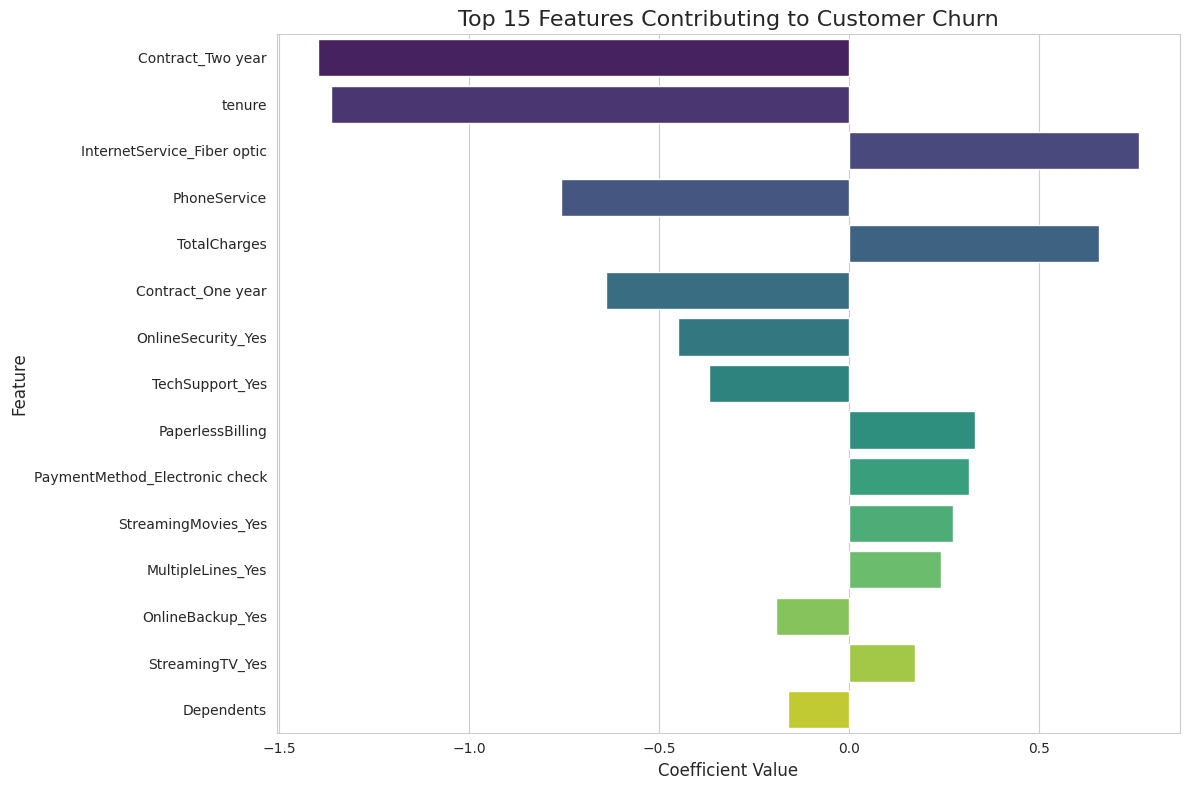

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure and an axes object
plt.figure(figsize=(12, 8))

# Create a bar plot
# Use 'Coefficient' for the bar height and color them based on positive/negative impact
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')

# Add labels and title
plt.title('Top 15 Features Contributing to Customer Churn', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add legend if needed (though for a single color bar plot, it's often implicit)
# plt.legend(title='Impact on Churn')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/tmp/ipython-input-260/1674864646.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Impact'] = top_features['Coefficient'].apply(lambda x: 'Positive Impact' if x > 0 else 'Negative Impact')


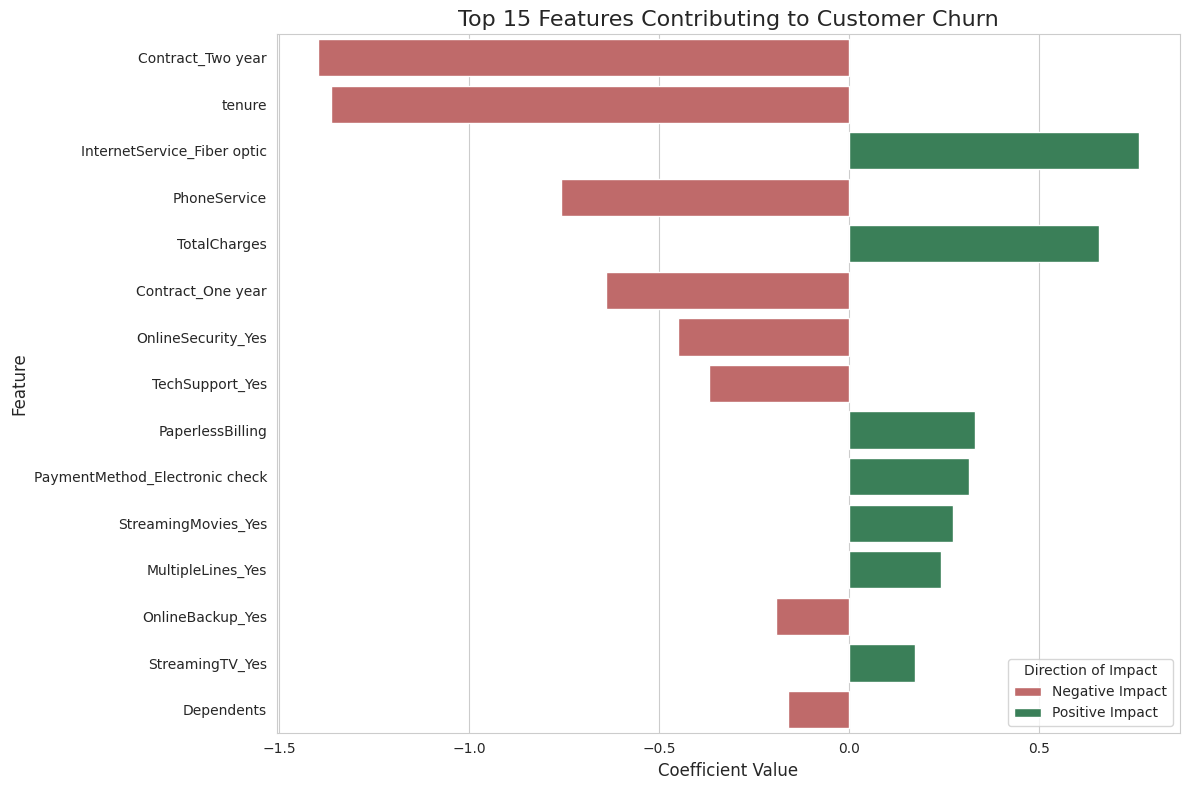

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Add a column to indicate the sign of the coefficient for coloring
top_features['Impact'] = top_features['Coefficient'].apply(lambda x: 'Positive Impact' if x > 0 else 'Negative Impact')

# Create a figure and an axes object
plt.figure(figsize=(12, 8))

# Create a bar plot, using 'Impact' for hue to distinguish positive/negative coefficients
sns.barplot(x='Coefficient', y='Feature', data=top_features, hue='Impact', dodge=False,
            palette={'Positive Impact': 'seagreen', 'Negative Impact': 'indianred'})

# Add labels and title
plt.title('Top 15 Features Contributing to Customer Churn', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add legend
plt.legend(title='Direction of Impact', loc='lower right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

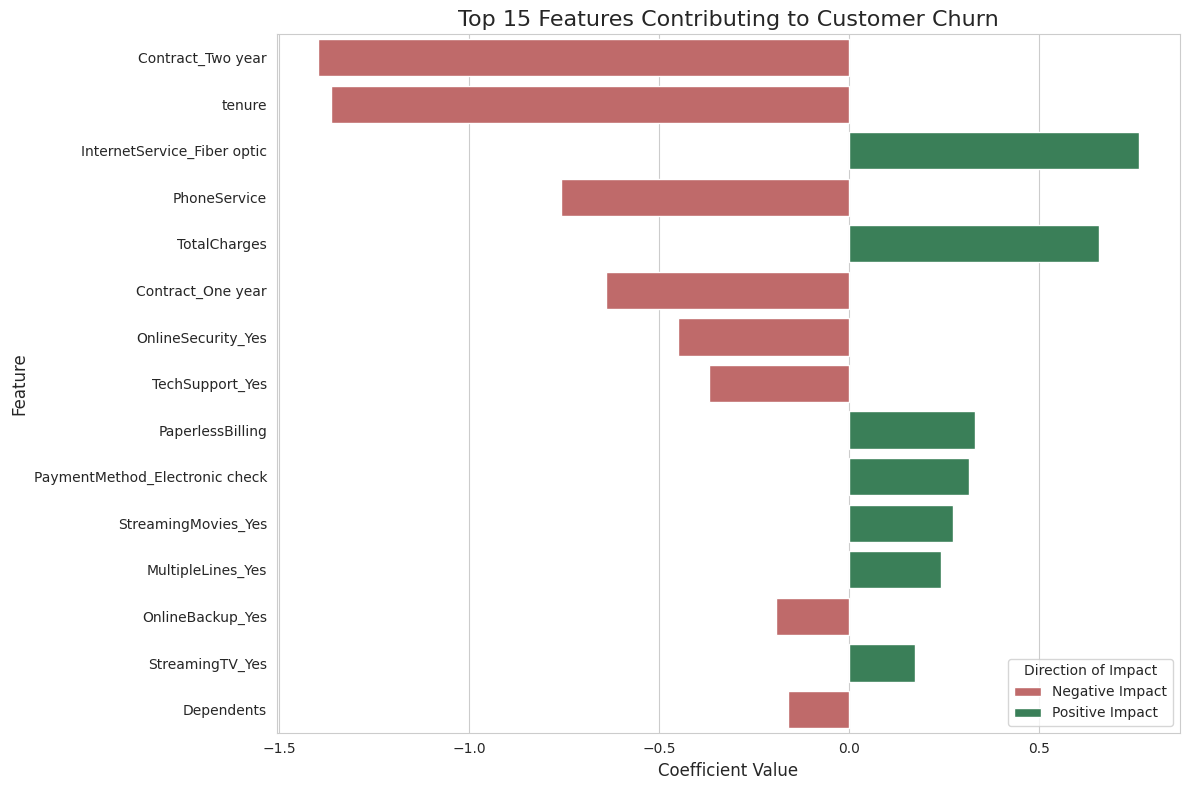

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Create a copy to avoid SettingWithCopyWarning
top_features_copy = top_features.copy()

# Add a column to indicate the sign of the coefficient for coloring
top_features_copy['Impact'] = top_features_copy['Coefficient'].apply(lambda x: 'Positive Impact' if x > 0 else 'Negative Impact')

# Create a figure and an axes object
plt.figure(figsize=(12, 8))

# Create a bar plot, using 'Impact' for hue to distinguish positive/negative coefficients
sns.barplot(x='Coefficient', y='Feature', data=top_features_copy, hue='Impact', dodge=False,
            palette={'Positive Impact': 'seagreen', 'Negative Impact': 'indianred'})

# Add labels and title
plt.title('Top 15 Features Contributing to Customer Churn', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add legend
plt.legend(title='Direction of Impact', loc='lower right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()